<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/Bitcoin_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Time Series Forecast : A basic introduction using Python**

Time series data is an important source for information and strategy used in finance industry. This technique plays a major role in understanding a lot of details on specific factors with respect to time.

Time series forecasting is basically the machine learning modeling for Time Series data (years, days, hour, etc.) for predicting future values using Time Series modeling. This approach helps if your data in serially correlated.

##Housekeeping: Import Modules, etc.

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

A data set was creted in Investing.com file, posted in Github and was pulled into the current working directory with !curl as follows.

the link to the website: https://www.investing.com/crypto/bitcoin/historical-data



### Read the dataset into a Pandas dataframe called data.

In [2]:
#replaced it with !curl 
!curl "https://raw.githubusercontent.com/lanashin/CST2312/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20(1).csv"  -o Bitcoin.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  137k  100  137k    0     0   757k      0 --:--:-- --:--:-- --:--:--  757k


In [3]:
data = pd.read_csv('Bitcoin.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

           Date     Price      Open      High       Low     Vol. Change %
0  May 12, 2022  28,309.9  29,073.4  30,136.7  26,500.5  315.21K   -2.61%
1  May 11, 2022  29,068.2  31,008.0  32,113.6  27,835.5  296.90K   -6.25%
2  May 10, 2022  31,007.5  30,098.2  32,621.2  29,831.0  235.61K    3.03%
3  May 09, 2022  30,095.0  34,041.0  34,227.0  30,095.0  268.09K  -11.64%
4  May 08, 2022  34,060.0  35,468.0  35,497.0  33,727.0  671.05M   -3.97%

 Data Types:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [4]:
#made sure the data is from 2017 only data presented
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1857,"Apr 11, 2017","1,220.7","1,206.7","1,229.6","1,195.8",37.40K,1.16%
1858,"Apr 10, 2017","1,206.7","1,204.3","1,214.9","1,194.8",40.01K,0.20%
1859,"Apr 09, 2017","1,204.3","1,180.8","1,215.1","1,174.0",45.35K,2.00%
1860,"Apr 08, 2017","1,180.8","1,190.5","1,198.2","1,166.7",33.18K,-0.82%
1861,"Apr 07, 2017","1,190.5","1,188.7","1,201.2","1,173.2",59.75K,0.15%


##OHLC

Fu=irst moodel I used to explore it: 
OHLC (o= open, h= high, l= low, c= close)
important points: 
date= have to be as object dtype as the other values in dataframe. 

In [5]:
#used plotly library with OHLC method (financial field)
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Price'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Price']))
fig.show()

### Cleanning Data

In [6]:
#removed the commas form the data
data['Price']=data['Price'].str.replace(',','')
data['Open']=data['Open'].str.replace(',','')
data['High']=data['High'].str.replace(',','')
data['Low']=data['Low'].str.replace(',','')
data['Change %']=data['Change %'].str.replace('%','')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 12, 2022",28309.9,29073.4,30136.7,26500.5,315.21K,-2.61
1,"May 11, 2022",29068.2,31008.0,32113.6,27835.5,296.90K,-6.25
2,"May 10, 2022",31007.5,30098.2,32621.2,29831.0,235.61K,3.03
3,"May 09, 2022",30095.0,34041.0,34227.0,30095.0,268.09K,-11.64
4,"May 08, 2022",34060.0,35468.0,35497.0,33727.0,671.05M,-3.97


In [7]:
#cleaned the % from the column titles 
data.rename(columns={'Change %':'Change'})

,Date,Price,Open,High,Low,Vol.,Change
0,"May 12, 2022",28309.9,29073.4,30136.7,26500.5,315.21K,-2.61
1,"May 11, 2022",29068.2,31008.0,32113.6,27835.5,296.90K,-6.25
2,"May 10, 2022",31007.5,30098.2,32621.2,29831.0,235.61K,3.03
3,"May 09, 2022",30095.0,34041.0,34227.0,30095.0,268.09K,-11.64
4,"May 08, 2022",34060.0,35468.0,35497.0,33727.0,671.05M,-3.97
...,...,...,...,...,...,...,...
1857,"Apr 11, 2017",1220.7,1206.7,1229.6,1195.8,37.40K,1.16
1858,"Apr 10, 2017",1206.7,1204.3,1214.9,1194.8,40.01K,0.20
1859,"Apr 09, 2017",1204.3,1180.8,1215.1,1174.0,45.35K,2.00
1860,"Apr 08, 2017",1180.8,1190.5,1198.2,1166.7,33.18K,-0.82


In [8]:
#to make all columns as floats
data['Price']=data.Price.replace('',np.nan).astype(float)
data['Open']=data.Price.replace('',np.nan).astype(float)
data['High']=data.Price.replace('',np.nan).astype(float)
data['Low']=data.Price.replace('',np.nan).astype(float)
data['Vol.']=data.Price.replace('',np.nan).astype(float)
data['Change %']=data.Price.replace('',np.nan).astype(float)

### Dataset Description

The data contains a particular Bitcoin criptocurrency in USD market (including Price when market was closed, opening price that day, High and Low proces during the day and vol. (is the sum total of actual trades taking place) and change in price that happened during the day. 
The data type here for all columns is object.

Convert it into a Time series object and use the Date column as the index.


Timestamps are useful objects for comparisons.     

Create a timestamp object with the `pd.to_datetime()` function and a string specifying the date. These timestamps are useful for logical filtering with dates.

In [9]:
from datetime import datetime
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2022-05-12', '2022-05-11', '2022-05-10', '2022-05-09',
               '2022-05-08', '2022-05-07', '2022-05-06', '2022-05-05',
               '2022-05-04', '2022-05-03',
               ...
               '2017-04-16', '2017-04-15', '2017-04-14', '2017-04-13',
               '2017-04-12', '2017-04-11', '2017-04-10', '2017-04-09',
               '2017-04-08', '2017-04-07'],
              dtype='datetime64[ns]', name='Date', length=1862, freq=None)

The data type is `datetime64[ns]`. For this notebook example it is read into a series rather than a dataframe but the approach works regardless of whether the data is in a series or a dataframe. 

In [10]:
#convert to time series:
ts = data['Price']
ts.head(10)

Date
2022-05-12    28309.9
2022-05-11    29068.2
2022-05-10    31007.5
2022-05-09    30095.0
2022-05-08    34060.0
2022-05-07    35468.0
2022-05-06    36009.0
2022-05-05    36544.0
2022-05-04    39688.0
2022-05-03    37718.0
Name: Price, dtype: float64

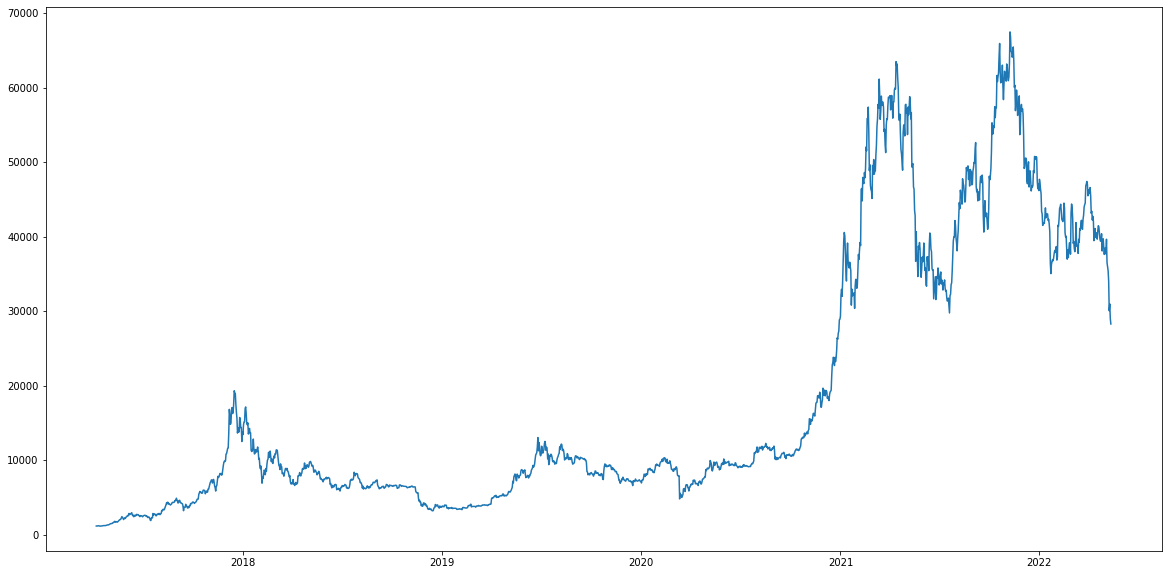

In [11]:
plt.figure(figsize=(20,10))
plt.plot(ts)

## Daily minimum prices in Bitcoin dataset

## Manipulation with data

Manipulation with data can help get an idea of the distribution and spread of values.

This may help with ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling.

First of all let's find the minimum temperature for all the time by specifing data and calling `min()` function

In [12]:
data.min()

Price       1176.2
Open        1176.2
High        1176.2
Low         1176.2
Vol.        1176.2
Change %    1176.2
dtype: float64

In [13]:
year = data.groupby('Date').agg({'Price': 'min'})


In [14]:
year.head(20)

,Price
Date,
2017-04-07,1190.5
2017-04-08,1180.8
2017-04-09,1204.3
2017-04-10,1206.7
2017-04-11,1220.7
2017-04-12,1212.5
2017-04-13,1176.2
2017-04-14,1177.3
2017-04-15,1177.0


In [15]:
data['Price'].agg('min')

1176.2

In [16]:
pivot = pd.pivot_table(
    data=data,
    index="Date",  # specifies the rows
    values="Open",  # specifies the content of the cells
    #aggfunc="count",  # we ask to count how many different CAMIS values we see
)
pivot

,Open
Date,
2017-04-07,1190.5
2017-04-08,1180.8
2017-04-09,1204.3
2017-04-10,1206.7
2017-04-11,1220.7
...,...
2022-05-08,34060.0
2022-05-09,30095.0
2022-05-10,31007.5


In [17]:
pivot.resample("1W").min()

,Open
Date,
2017-04-09,1180.8
2017-04-16,1176.2
2017-04-23,1194.0
2017-04-30,1248.2
2017-05-07,1415.8
...,...
2022-04-17,39497.0
2022-04-24,39418.0
2022-05-01,37650.0


In [19]:
pivot.resample('1Y').min()

,Open
Date,
2017-12-31,1176.2
2018-12-31,3228.7
2019-12-31,3397.7
2020-12-31,4826.0
2021-12-31,29359.9
2022-12-31,28309.9


In [20]:
pivot.resample('1Q').min()

,Open
Date,
2017-06-30,1176.2
2017-09-30,1914.1
2017-12-31,4218.7
2018-03-31,6853.7
2018-06-30,5883.5
2018-09-30,6152.3
2018-12-31,3228.7
2019-03-31,3397.7
2019-06-30,4145.1


In [21]:
qauter_min= pivot.resample('1Q').min()

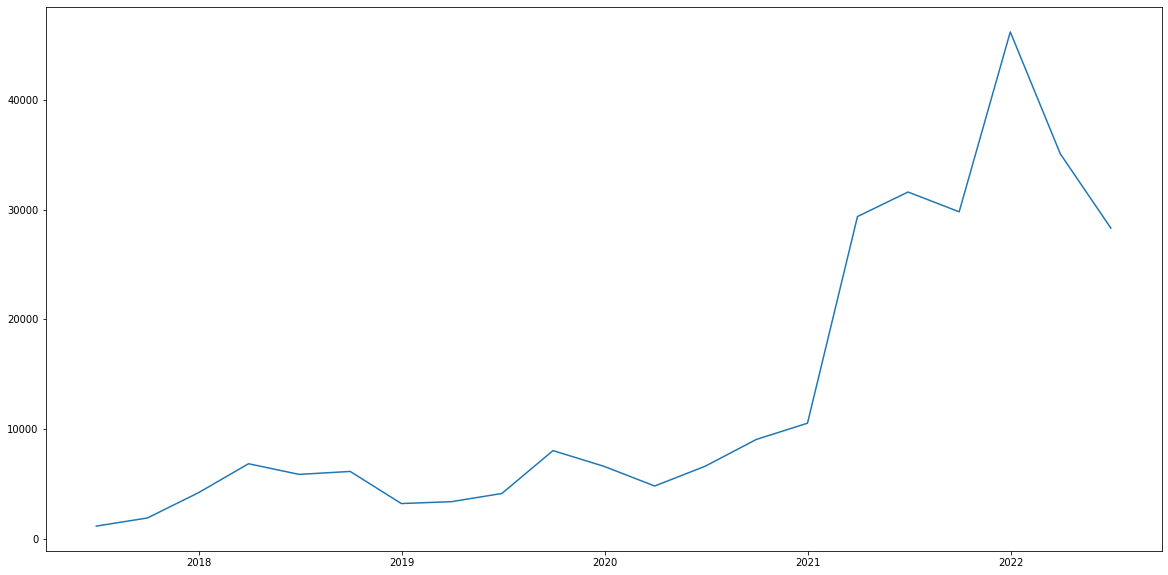

In [22]:
plt.figure(figsize=(20,10))
plt.plot(qauter_min)

## Focusing on big changes in my data

In [23]:
big_jump = data['2020-12-31':'2021-03-31']

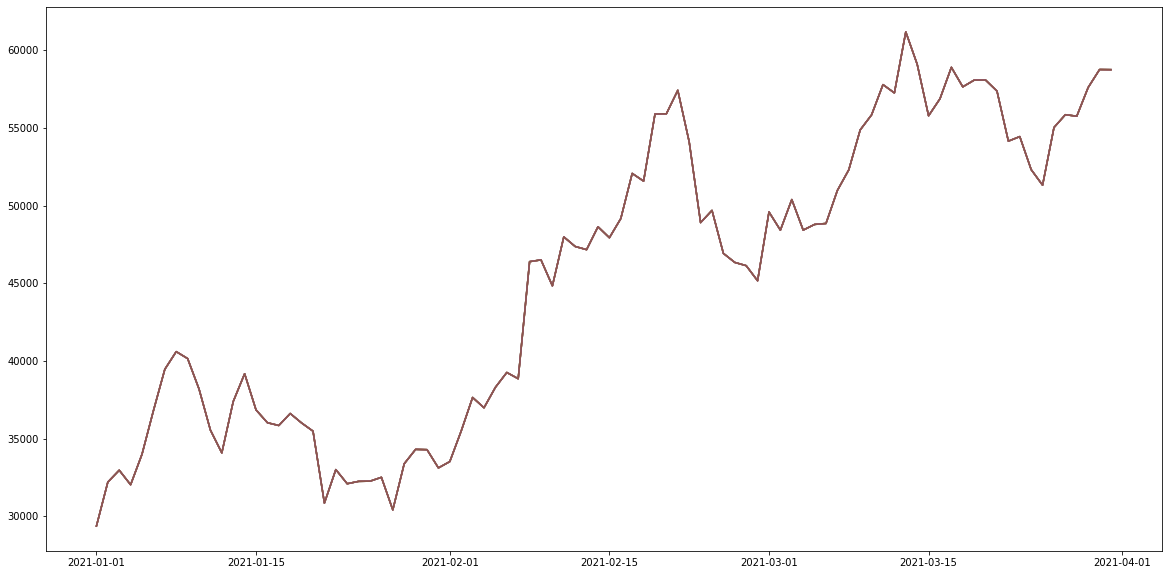

In [24]:
plt.figure(figsize=(20,10))
plt.plot(big_jump)

In [25]:
pivot2 = pd.pivot_table(
    data=big_jump,
    index="Date",  # specifies the rows
    values="Price",  # specifies the content of the cells
    #aggfunc="count",  # we ask to count how many different CAMIS values we see
)
pivot2

,Price
Date,
2021-01-01,29359.9
2021-01-02,32193.3
2021-01-03,32958.9
2021-01-04,32022.6
2021-01-05,33991.5
...,...
2021-03-27,55862.9
2021-03-28,55765.2
2021-03-29,57616.2


In [26]:
big_jum_w =pivot2.resample('1W').min()

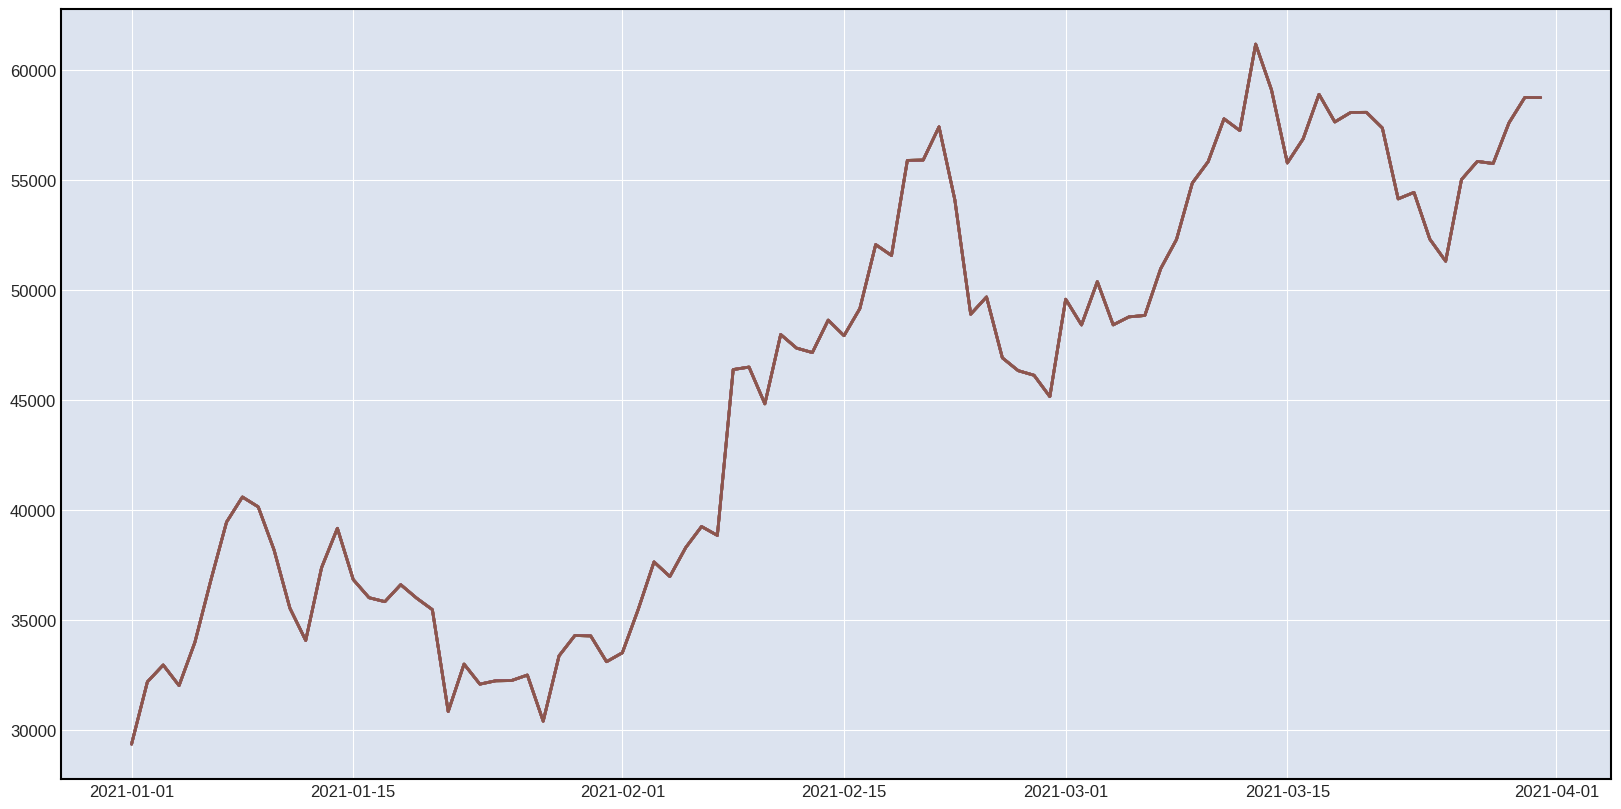

In [58]:
plt.figure(figsize=(20,10))
plt.plot(big_jump)

In [59]:
year = pivot.resample('1Y').max()

,Open
Date,
2017-12-31,19345.5
2018-12-31,17172.3
2019-12-31,13063.8
2020-12-31,28949.4
2021-12-31,67527.9
2022-12-31,47738.0


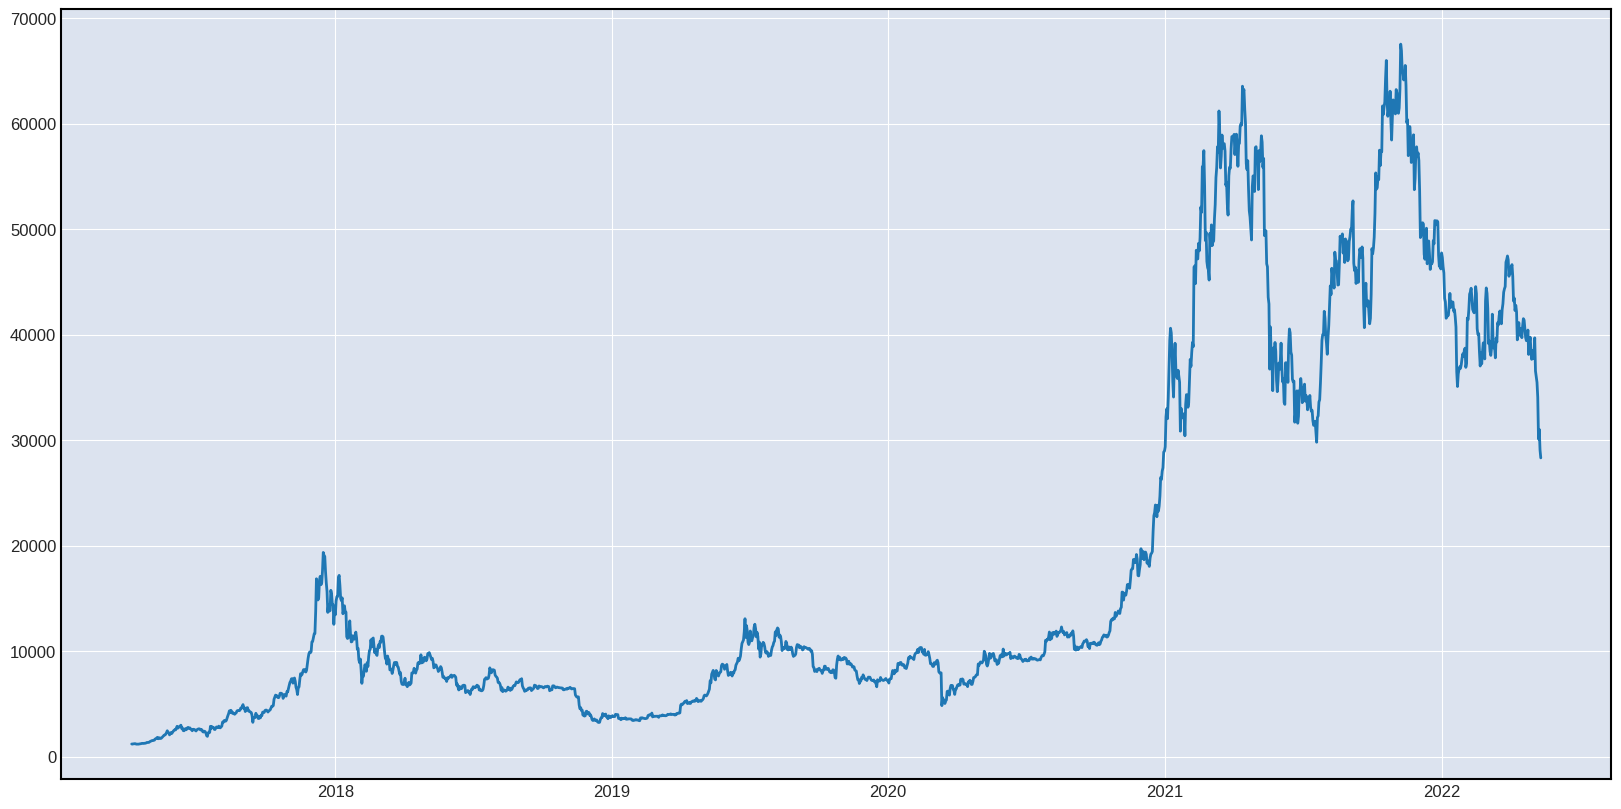

In [60]:
plt.figure(figsize=(20,10))
plt.plot(year)

In [29]:
 quater_max = pivot.resample('1Q').max()
 print(quater_max)

               Open
Date               
2017-06-30   2973.4
2017-09-30   4921.9
2017-12-31  19345.5
2018-03-31  17172.3
2018-06-30   9853.5
2018-09-30   8407.0
2018-12-31   6705.3
2019-03-31   4120.4
2019-06-30  13063.8
2019-09-30  12541.5
2019-12-31   9529.6
2020-03-31  10333.0
2020-06-30  10189.3
2020-09-30  12282.6
2020-12-31  28949.4
2021-03-31  61195.3
2021-06-30  63540.9
2021-09-30  52672.1
2021-12-31  67527.9
2022-03-31  47738.0
2022-06-30  46629.0


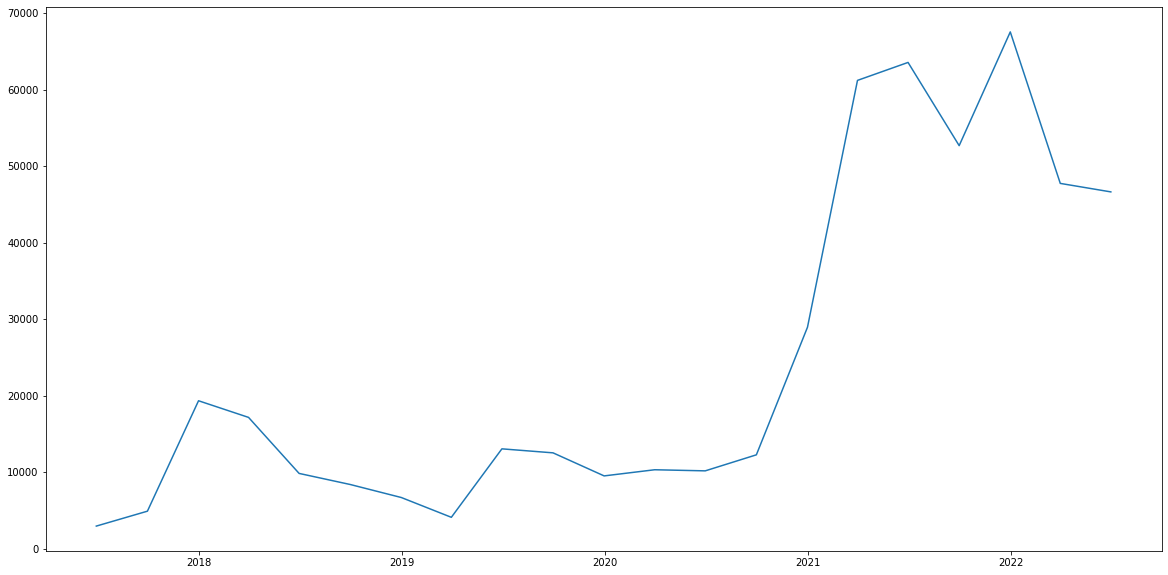

In [30]:
plt.figure(figsize=(20,10))
plt.plot(quater_max)

In [31]:
data['2017-04'].agg({"Price":"min"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Price    1176.2
dtype: float64

In [32]:
data['2018'].agg({"Price":"min"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Price    3228.7
dtype: float64

In [33]:
data['2019'].agg({"Price":"min"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Price    3397.7
dtype: float64

In [34]:
data['2020'].agg({"Price":"min"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Price    4826.0
dtype: float64

In [35]:
data['2021'].agg({"Price":"min"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Price    29359.9
dtype: float64

In [36]:
data['2022'].agg({"Price":"min"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Price    28309.9
dtype: float64

In [37]:
apr17=data['2017-04']
print(apr17)

             Price    Open    High     Low    Vol.  Change %
Date                                                        
2017-04-30  1351.9  1351.9  1351.9  1351.9  1351.9    1351.9
2017-04-29  1336.3  1336.3  1336.3  1336.3  1336.3    1336.3
2017-04-28  1329.6  1329.6  1329.6  1329.6  1329.6    1329.6
2017-04-27  1332.9  1332.9  1332.9  1332.9  1332.9    1332.9
2017-04-26  1286.6  1286.6  1286.6  1286.6  1286.6    1286.6
2017-04-25  1264.3  1264.3  1264.3  1264.3  1264.3    1264.3
2017-04-24  1248.2  1248.2  1248.2  1248.2  1248.2    1248.2
2017-04-23  1249.1  1249.1  1249.1  1249.1  1249.1    1249.1
2017-04-22  1240.9  1240.9  1240.9  1240.9  1240.9    1240.9
2017-04-21  1249.6  1249.6  1249.6  1249.6  1249.6    1249.6
2017-04-20  1238.1  1238.1  1238.1  1238.1  1238.1    1238.1
2017-04-19  1215.2  1215.2  1215.2  1215.2  1215.2    1215.2
2017-04-18  1206.1  1206.1  1206.1  1206.1  1206.1    1206.1
2017-04-17  1194.0  1194.0  1194.0  1194.0  1194.0    1194.0
2017-04-16  1176.8  1176

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [38]:
data.max()

Price       67527.9
Open        67527.9
High        67527.9
Low         67527.9
Vol.        67527.9
Change %    67527.9
dtype: float64

##mplfinance

While the Matplotlib library is one of those elements that make Python a great environment for data visualization, when it comes to OHLC financial charts it has so far performed below its true potential. The package that handles the drawing of OHLC and candlestick charts within Matplotlib is called mpl-finance, a module that used to be part of the main Matplotlib distribution until it was declared deprecated and became available only as a separate package. That happened, I believe, for a good reason: mpl-finance is not particularly well integrated with pandas nor as easy to use as other plotting features of Matplotlib.


This library is made for stocks and finance industry.  

OHLC (o= open, h= high, l= low, c= close)
important points: 
date= have to be as datetime index dtype as the other values has to be int or float.  

In [39]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [40]:
#replaced it with !curl 
!curl "https://raw.githubusercontent.com/lanashin/CST2312/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20(1).csv"  -o Bitcoin.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  137k  100  137k    0     0  1621k      0 --:--:-- --:--:-- --:--:-- 1640k


In [41]:
data = pd.read_csv('Bitcoin.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

           Date     Price      Open      High       Low     Vol. Change %
0  May 12, 2022  28,309.9  29,073.4  30,136.7  26,500.5  315.21K   -2.61%
1  May 11, 2022  29,068.2  31,008.0  32,113.6  27,835.5  296.90K   -6.25%
2  May 10, 2022  31,007.5  30,098.2  32,621.2  29,831.0  235.61K    3.03%
3  May 09, 2022  30,095.0  34,041.0  34,227.0  30,095.0  268.09K  -11.64%
4  May 08, 2022  34,060.0  35,468.0  35,497.0  33,727.0  671.05M   -3.97%

 Data Types:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [42]:
#removed the commas form the data
data['Price']=data['Price'].str.replace(',','')
data['Open']=data['Open'].str.replace(',','')
data['High']=data['High'].str.replace(',','')
data['Low']=data['Low'].str.replace(',','')
data['Change %']=data['Change %'].str.replace('%','')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 12, 2022",28309.9,29073.4,30136.7,26500.5,315.21K,-2.61
1,"May 11, 2022",29068.2,31008.0,32113.6,27835.5,296.90K,-6.25
2,"May 10, 2022",31007.5,30098.2,32621.2,29831.0,235.61K,3.03
3,"May 09, 2022",30095.0,34041.0,34227.0,30095.0,268.09K,-11.64
4,"May 08, 2022",34060.0,35468.0,35497.0,33727.0,671.05M,-3.97


In [43]:
data['Price'] = data['Price'].astype(float)
data['Open'] = data['Open'].astype(float)
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].astype(float)
#data['Vol.'] = data['Vol.'].astype(float)
#data['Change %'] = data['Change %'].astype(float)

In [44]:
print(data.dtypes)

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object


In [45]:
pip install --upgrade mplfinance

     |████████████████████████████████| 70 kB 3.6 MB/s 


In [46]:
import mplfinance as mpf

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




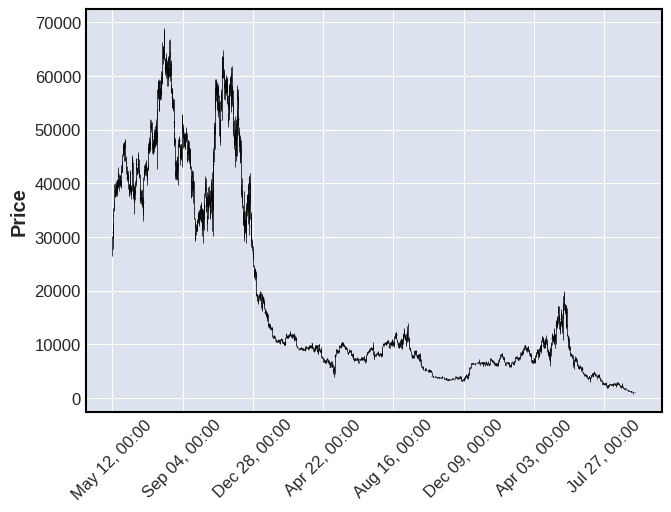

In [47]:
daily = pd.read_csv('Bitcoin.csv', index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily = data.rename(columns={'Price':'Close'})
daily['Date']=pd.to_datetime(daily['Date'])
daily.set_index('Date', inplace=True)
daily.shape
#daily.head(3)
#daily.tail(100)
mpf.plot(daily)

##More charts that present the data: Error Level

Interesting points:
 needed to change the Price to Close 
 neede to clean the data.

In [48]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [49]:
#replaced it with !curl 
!curl "https://raw.githubusercontent.com/lanashin/CST2312/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20(1).csv"  -o Bitcoin.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  137k  100  137k    0     0  1837k      0 --:--:-- --:--:-- --:--:-- 1837k


In [50]:
data = pd.read_csv('Bitcoin.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

           Date     Price      Open      High       Low     Vol. Change %
0  May 12, 2022  28,309.9  29,073.4  30,136.7  26,500.5  315.21K   -2.61%
1  May 11, 2022  29,068.2  31,008.0  32,113.6  27,835.5  296.90K   -6.25%
2  May 10, 2022  31,007.5  30,098.2  32,621.2  29,831.0  235.61K    3.03%
3  May 09, 2022  30,095.0  34,041.0  34,227.0  30,095.0  268.09K  -11.64%
4  May 08, 2022  34,060.0  35,468.0  35,497.0  33,727.0  671.05M   -3.97%

 Data Types:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [51]:
data2 = data.rename(columns={'Price':'Close'})
print(data2.columns)

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [52]:
#removed the commas form the data
data2['Close']=data2['Close'].str.replace(',','')
data2['Open']=data2['Open'].str.replace(',','')
data2['High']=data2['High'].str.replace(',','')
data2['Low']=data2['Low'].str.replace(',','')
#data['Change %']=data['Change %'].str.replace('%','')
data2.head()

,Date,Close,Open,High,Low,Vol.,Change %
0,"May 12, 2022",28309.9,29073.4,30136.7,26500.5,315.21K,-2.61%
1,"May 11, 2022",29068.2,31008.0,32113.6,27835.5,296.90K,-6.25%
2,"May 10, 2022",31007.5,30098.2,32621.2,29831.0,235.61K,3.03%
3,"May 09, 2022",30095.0,34041.0,34227.0,30095.0,268.09K,-11.64%
4,"May 08, 2022",34060.0,35468.0,35497.0,33727.0,671.05M,-3.97%


In [53]:
data2['Close'] = data2['Close'].astype(float)
data2['Open'] = data2['Open'].astype(float)
data2['High'] = data2['High'].astype(float)
data2['Low'] = data2['Low'].astype(float)
#data['Vol.'] = data['Vol.'].astype(float)
#data['Change %'] = data['Change %'].astype(float)

In [54]:
from datetime import datetime
con=data2['Date']
data2['Date']=pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)
#check datatype of index
data2.index

DatetimeIndex(['2022-05-12', '2022-05-11', '2022-05-10', '2022-05-09',
               '2022-05-08', '2022-05-07', '2022-05-06', '2022-05-05',
               '2022-05-04', '2022-05-03',
               ...
               '2017-04-16', '2017-04-15', '2017-04-14', '2017-04-13',
               '2017-04-12', '2017-04-11', '2017-04-10', '2017-04-09',
               '2017-04-08', '2017-04-07'],
              dtype='datetime64[ns]', name='Date', length=1862, freq=None)

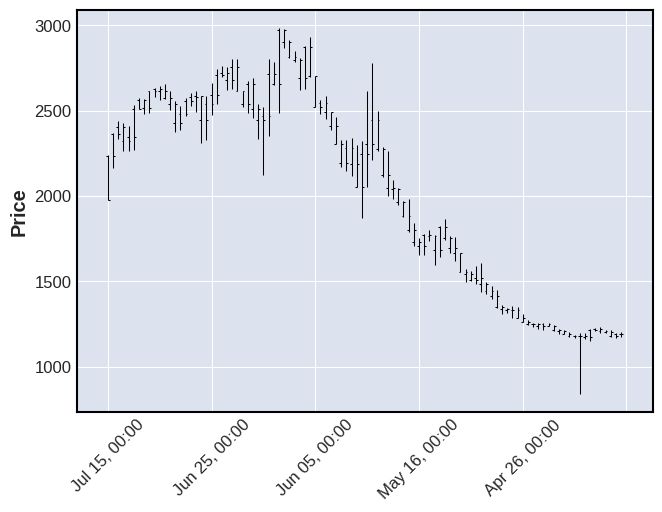

In [55]:
mpf.plot(data2[-100:], no_xgaps = True)
plt.show()

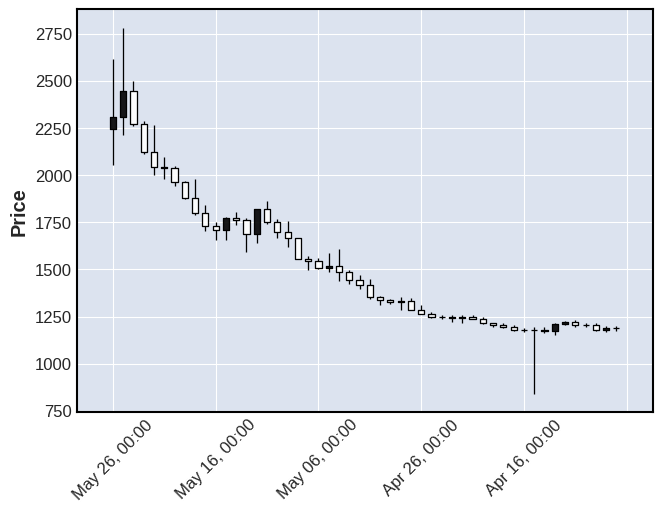

In [56]:
mpf.plot(data2[-50:], type='candlestick', no_xgaps = True)